In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
df=pd.read_csv("/content/drive/MyDrive/crash.csv")

In [9]:
df.head(10)

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,Crash_Type,Seatbelt_Usage,Speed_Limit,Road_Surface_Condition
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,Rear-end,No,30,Icy
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,Rear-end,Yes,110,Dry
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,Rear-end,No,59,Dry
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,Rear-end,No,73,Wet
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,Rear-end,Yes,42,Wet
5,Minor injury,15,20,49,Female,Car,3,3.387430,Rural,Yes,Rear-end,Yes,117,Dry
6,Minor injury,62,6,70,Male,Car,1,3.464110,Urban,No,Head-on,Yes,55,Dry
7,Minor injury,96,17,69,Male,Car,2,3.199897,Rural,Yes,Head-on,Yes,117,Icy
8,Minor injury,85,8,40,Female,Car,2,3.333741,Rural,No,Head-on,Yes,97,Icy
9,Minor injury,120,21,18,Female,Car,1,3.113678,Urban,No,Rear-end,No,100,Dry


In [10]:
for i in df:
    print(i,"--->",df[i].unique(),"\n")

Crash_Severity ---> ['Minor injury' 'Major injury' 'Fatal crash'] 

Vehicle_Speed ---> [107  27  87  43  72  15  62  96  85 120  76  37  13  50  98  44  35  40
  30 105  49  70  60  82  88  57  75  25 104  20  90 106 109 113  94  38
  84  56  41  99  39  89  10  83  59  92  48  52 100  95  28  14  24  21
  42  93  23  33  81  31  32  45  22  55  34 116  18 114 118  26  36 108
 102  78 103 112  68 110  67  47 115  53  46 117  74  79  19  80  71  58
  54  17  65  61  64  97  69 119 111  77  12  51  91  29  66] 

Crash_Time ---> [11 16 14  3  8 20  6 17 21 22 15  5  2  1 13 19 23 10  7 18 12  0  4  9] 

Age ---> [27 39 42 60 70 49 69 40 18 43 38 36 31 80 56 26 72 25 37 68 41 63 32 44
 58 62 61 78 48 28 22 34 33 77 47 55 53 46 74 19 73 20 65 75 54 67 50 24
 52 23 66 35 79 45 30 57 51 21 59 71 29 64] 

Gender ---> ['Male' 'Female'] 

Vehicle_Type ---> ['Heavy Vehicle' 'Car' 'T.W'] 

Number_of_Lanes ---> [2 3 1] 

Lane_Width ---> [3.484386 3.293091 3.218911 3.113012 3.10658  3.38743  3.46411

In [11]:
df1 = pd.concat(
    [
        df,
        pd.get_dummies(df["Gender"], prefix="Gender",drop_first=True),
        pd.get_dummies(df["Road_Type"], prefix="Road_Type",drop_first=True),
        pd.get_dummies(df["Vehicle_Type"], prefix="Vehicle_Type",drop_first=True),
        pd.get_dummies(df["Crash_Type"], prefix="Crash_Type",drop_first=True),
        pd.get_dummies(df["Seatbelt_Usage"], prefix="Seatbelt",drop_first=True),
        pd.get_dummies(df["Road_Surface_Condition"], prefix="Road_Surface",drop_first=True),
        pd.get_dummies(df["Alcohol_Consumption"], prefix="Alcohol_Consumption",drop_first=True),

    ],
    axis=1,
)


In [12]:
df1

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Gender,Vehicle_Type,Number_of_Lanes,Lane_Width,Road_Type,Alcohol_Consumption,...,Road_Surface_Condition,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes
0,Minor injury,107,11,27,Male,Heavy Vehicle,2,3.484386,Urban,Yes,...,Icy,True,True,True,False,True,False,True,False,True
1,Minor injury,27,16,39,Male,Car,2,3.293091,Rural,Yes,...,Dry,True,False,False,False,True,True,False,False,True
2,Minor injury,87,14,42,Female,Car,3,3.218911,Urban,No,...,Dry,False,True,False,False,True,False,False,False,False
3,Minor injury,43,3,60,Female,Heavy Vehicle,2,3.113012,Rural,No,...,Wet,False,False,True,False,True,False,False,True,False
4,Minor injury,72,8,70,Male,T.W,3,3.106580,Urban,Yes,...,Wet,True,True,False,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,Male,Car,1,3.248476,Urban,No,...,Icy,True,True,False,False,False,False,True,False,False
296,Fatal crash,87,21,52,Female,Heavy Vehicle,2,3.037739,Urban,Yes,...,Icy,False,True,True,False,True,False,True,False,True
297,Fatal crash,85,20,79,Female,Heavy Vehicle,2,3.350668,Rural,Yes,...,Wet,False,False,True,False,True,False,False,True,True
298,Fatal crash,44,5,23,Female,Car,3,3.419304,Urban,Yes,...,Wet,False,True,False,False,True,True,False,True,True


In [13]:
df1.drop(
    ["Gender", "Road_Type", "Vehicle_Type", "Crash_Type", "Seatbelt_Usage", "Road_Surface_Condition","Alcohol_Consumption"],
    axis=1,
    inplace=True,
)


In [14]:
df1

,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes
0,Minor injury,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True
1,Minor injury,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True
2,Minor injury,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False
3,Minor injury,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False
4,Minor injury,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fatal crash,112,4,30,1,3.248476,118,True,True,False,False,False,False,True,False,False
296,Fatal crash,87,21,52,2,3.037739,38,False,True,True,False,True,False,True,False,True
297,Fatal crash,85,20,79,2,3.350668,80,False,False,True,False,True,False,False,True,True
298,Fatal crash,44,5,23,3,3.419304,47,False,True,False,False,True,True,False,True,True


In [15]:
df1["Crash_Severity"].unique()
print( ["Minor injury", "Major injury", "Fatal crash"].reverse())

None


In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a custom ordering for the severity levels
severity_order = [ "Fatal crash", "Major injury","Minor injury"]

# Use pandas' Categorical to enforce this order
df1["Crash_Severity"] = pd.Categorical(df1["Crash_Severity"], categories=severity_order, ordered=True)

# Apply LabelEncoder
le = LabelEncoder()
df1['Labelled_Severity'] = le.fit_transform(df1["Crash_Severity"])

# Verify the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))  # To see the mapping
df1.head()


{'Fatal crash': 0, 'Major injury': 1, 'Minor injury': 2}


,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,Minor injury,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,2
1,Minor injury,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,2
2,Minor injury,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,2
3,Minor injury,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,2
4,Minor injury,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,2


In [17]:
# Create a custom ordering for the severity levels
severity_order = ["Minor injury", "Major injury", "Fatal crash"]

# Use pandas' Categorical to enforce this order
df1["Crash_Severity"] = pd.Categorical(df1["Crash_Severity"], categories=severity_order, ordered=True)

# Use .codes to get integer encoding based on the order
df1['Labelled_Severity'] = df1["Crash_Severity"].cat.codes

# Verify the mapping
print(df1[["Crash_Severity", "Labelled_Severity"]].drop_duplicates())
df1.head()


    Crash_Severity  Labelled_Severity
0     Minor injury                  0
100   Major injury                  1
200    Fatal crash                  2


,Crash_Severity,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,Minor injury,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,0
1,Minor injury,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,0
2,Minor injury,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,0
3,Minor injury,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,0
4,Minor injury,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,0


In [18]:
df1.drop("Crash_Severity",axis=1,inplace=True)

In [19]:
correlation = df1.corr()  # Compute the correlation matrix
crash_severity_corr = correlation["Labelled_Severity"].sort_values(ascending=False)
correlation["Labelled_Severity"]

,Labelled_Severity
Vehicle_Speed,0.074486
Crash_Time,-0.092824
Age,0.018858
Number_of_Lanes,0.009901
Lane_Width,-0.027923
Speed_Limit,0.018271
Gender_Male,-0.016333
Road_Type_Urban,-0.016339
Vehicle_Type_Heavy Vehicle,0.025678
Vehicle_Type_T.W,0.143468


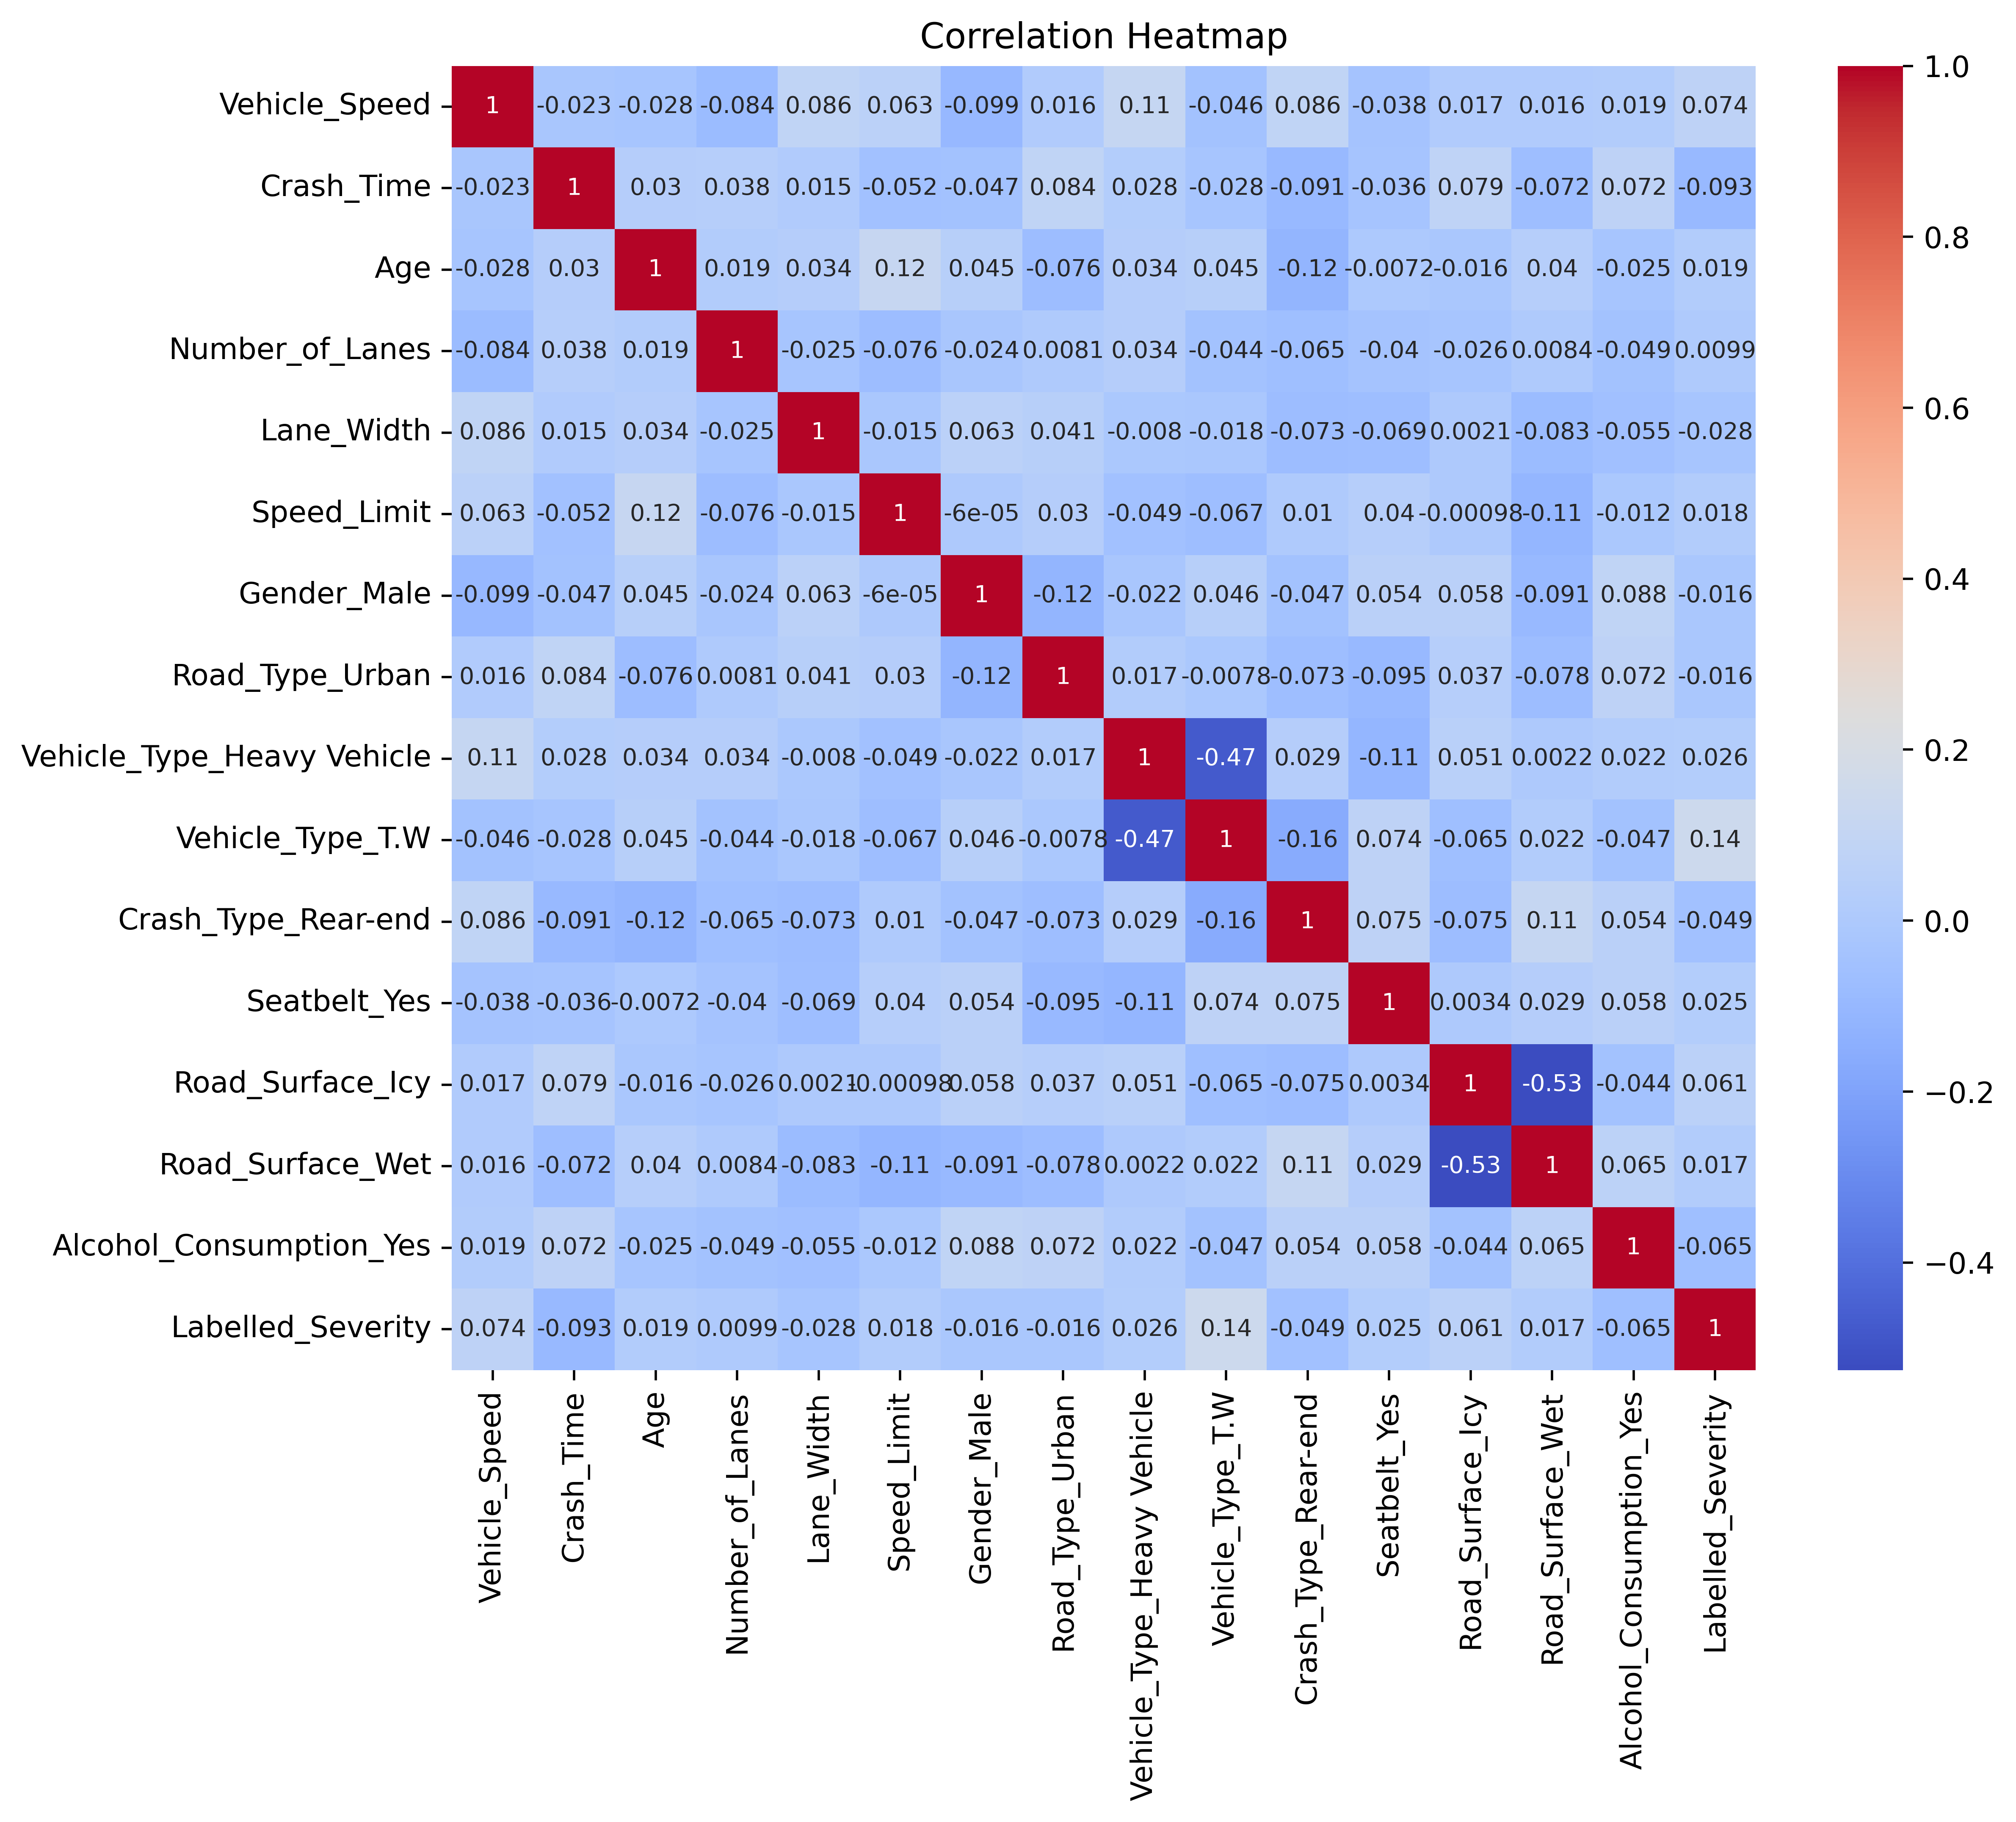

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8),dpi=500)
sns.heatmap(correlation, annot=True,annot_kws={"size":8}, cmap="coolwarm", cbar=True,square=True)
plt.title("Correlation Heatmap")
plt.show()


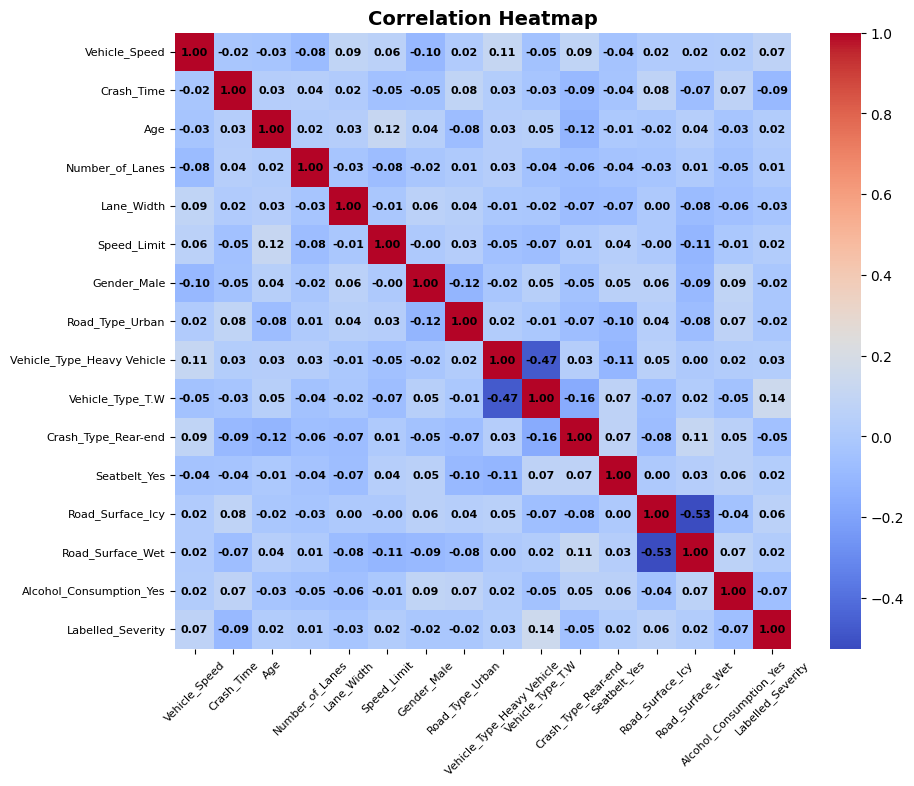

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap with annotations
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(
    correlation,
    annot=True,
    annot_kws={"size": 8, "color": "black", "fontweight": "bold"},  # Customize text appearance
    fmt=".2f",  # Format for numerical values
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()


In [22]:
df1

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,0
1,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,0
2,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,0
3,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,0
4,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,112,4,30,1,3.248476,118,True,True,False,False,False,False,True,False,False,2
296,87,21,52,2,3.037739,38,False,True,True,False,True,False,True,False,True,2
297,85,20,79,2,3.350668,80,False,False,True,False,True,False,False,True,True,2
298,44,5,23,3,3.419304,47,False,True,False,False,True,True,False,True,True,2


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, recall_score, precision_score

# Assuming df is your dataframe
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass

# Print the evaluation metrics
print("Accuracy:", accuracy*100,"%")
print("Mean Squared Error (MSE):", mse)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 30.0 %
Mean Squared Error (MSE): 1.25
F1 Score: 0.29712722298221617
Recall: 0.3
Precision: 0.32116402116402115


In [24]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from catboost import CatBoostClassifier

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Initialize the CatBoost Classifier with class weights
catboost_classifier = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    class_weights=[1, 2, 3],  # Adjust these weights based on your class distribution
    verbose=0
)

# Train the model
catboost_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy * 100, "%")
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Optional: Display feature importance
feature_importances = catboost_classifier.get_feature_importance(prettified=True)
print("Feature Importances:\n", feature_importances)


Accuracy: 33.33333333333333 %
F1 Score: 0.34243819266837167
Recall: 0.3333333333333333
Precision: 0.3688888888888889
Feature Importances:
                     Feature Id  Importances
0                Vehicle_Speed    15.006750
1                   Lane_Width    14.596352
2                          Age    12.076024
3                  Speed_Limit    11.502594
4                   Crash_Time    11.450026
5              Number_of_Lanes     6.431787
6      Alcohol_Consumption_Yes     6.321863
7                  Gender_Male     3.502999
8                 Seatbelt_Yes     3.493544
9              Road_Type_Urban     3.435669
10            Vehicle_Type_T.W     3.097489
11  Vehicle_Type_Heavy Vehicle     2.686075
12         Crash_Type_Rear-end     2.242570
13            Road_Surface_Wet     2.123792
14            Road_Surface_Icy     2.032467


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize the CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_regressor.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Convert regression predictions to nearest integer for classification
y_pred_class = y_pred.round().astype(int)  # Round predictions to nearest integer

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
precision = precision_score(y_test, y_pred_class, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy * 100, "%")
print("Mean Squared Error (MSE):", mse)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Optional: Display feature importance
feature_importances = catboost_regressor.get_feature_importance(prettified=True)
print("Feature Importances:\n", feature_importances)


Accuracy: 40.0 %
Mean Squared Error (MSE): 0.8462038
F1 Score: 0.33921901528013587
Recall: 0.4
Precision: 0.3364285714285714
Feature Importances:
                     Feature Id  Importances
0                   Lane_Width    16.093302
1                Vehicle_Speed    13.981348
2                  Speed_Limit    13.897220
3                          Age    12.035878
4                   Crash_Time     9.545889
5              Number_of_Lanes     7.255902
6      Alcohol_Consumption_Yes     6.959752
7   Vehicle_Type_Heavy Vehicle     4.614638
8             Vehicle_Type_T.W     3.309306
9             Road_Surface_Icy     2.739060
10                 Gender_Male     2.676886
11         Crash_Type_Rear-end     2.476604
12                Seatbelt_Yes     1.761126
13             Road_Type_Urban     1.506984
14            Road_Surface_Wet     1.146105


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from catboost import CatBoostClassifier

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Initialize the CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy * 100, "%")
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Optional: Display feature importance
feature_importances = catboost_classifier.get_feature_importance(prettified=True)
print("Feature Importances:\n", feature_importances)


Accuracy: 31.666666666666664 %
F1 Score: 0.3073521716378859
Recall: 0.31666666666666665
Precision: 0.3227777777777778
Feature Importances:
                     Feature Id  Importances
0                   Lane_Width    14.894944
1                Vehicle_Speed    14.503167
2                  Speed_Limit    12.328891
3                          Age    12.085984
4                   Crash_Time    10.598737
5              Number_of_Lanes     7.371560
6      Alcohol_Consumption_Yes     6.427355
7              Road_Type_Urban     3.599411
8                 Seatbelt_Yes     3.202673
9   Vehicle_Type_Heavy Vehicle     2.879049
10            Road_Surface_Wet     2.792841
11            Vehicle_Type_T.W     2.717883
12                 Gender_Male     2.352298
13         Crash_Type_Rear-end     2.202513
14            Road_Surface_Icy     2.042693


In [28]:
import pandas as pd
from sklearn.model_selection import cross_validate
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Initialize the CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Define custom function to calculate multiple metrics
def custom_metrics(estimator, X, y):
    y_pred = estimator.predict(X)
    y_pred_class = np.round(y_pred).astype(int)  # Round predictions to nearest integer

    accuracy = accuracy_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class, average='weighted')
    recall = recall_score(y, y_pred_class, average='weighted')
    precision = precision_score(y, y_pred_class, average='weighted')

    return {'accuracy': accuracy, 'f1': f1, 'recall': recall, 'precision': precision}

# Perform 5-fold cross-validation and use the custom scorer
cv_results = cross_validate(catboost_regressor, X, y, cv=5, scoring=custom_metrics, return_train_score=False)

# Output the evaluation metrics from cross-validation
print(f"Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"F1 Score: {cv_results['test_f1']}")
print(f"Recall: {cv_results['test_recall']}")
print(f"Precision: {cv_results['test_precision']}")

# Calculate mean scores for each metric
print(f"\nMean Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1']):.4f}")
print(f"Mean Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"Mean Precision: {np.mean(cv_results['test_precision']):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classifi

Cross-validation results:
Accuracy: [0.         0.26666667 0.73333333 0.3        0.05      ]
F1 Score: [0.         0.21502097 0.84615385 0.19599724 0.0952381 ]
Recall: [0.         0.26666667 0.73333333 0.3        0.05      ]
Precision: [0.         0.55826558 1.         0.44897959 1.        ]

Mean Accuracy: 0.2700
Mean F1 Score: 0.2705
Mean Recall: 0.2700
Mean Precision: 0.6014


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import xgboost as xgb

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets (95:5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,        # Maximum tree depth for base learners
    verbosity=0,        # Suppress output
    objective='reg:squarederror',  # Regression with squared loss
    random_state=25
)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert regression predictions to nearest integer for classification
y_pred_class = y_pred.round().astype(int)  # Round predictions to nearest integer

# Classification metrics
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
precision = precision_score(y_test, y_pred_class, average='weighted')

# Print the evaluation metrics
print("Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

print("\nClassification Metrics:")
print("Accuracy:", accuracy * 100, "%")
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

# Feature importances
feature_importances = xgb_regressor.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Regression Metrics:
Mean Squared Error (MSE): 0.9739949
Mean Absolute Error (MAE): 0.8436285
R-squared: -0.6084318161010742

Classification Metrics:
Accuracy: 33.33333333333333 %
F1 Score: 0.30410509031198685
Recall: 0.3333333333333333
Precision: 0.3

Feature Importances:
                       Feature  Importance
9             Vehicle_Type_T.W    0.122956
14     Alcohol_Consumption_Yes    0.097934
4                   Lane_Width    0.091044
12            Road_Surface_Icy    0.088173
10         Crash_Type_Rear-end    0.085959
2                          Age    0.067849
7              Road_Type_Urban    0.062286
6                  Gender_Male    0.059715
5                  Speed_Limit    0.057612
1                   Crash_Time    0.054884
0                Vehicle_Speed    0.050947
8   Vehicle_Type_Heavy Vehicle    0.044279
11                Seatbelt_Yes    0.041167
13            Road_Surface_Wet    0.039259
3              Number_of_Lanes    0.035938


In [42]:
# Example of how the data is handled and used in the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features (all columns except 'Labelled_Severity')
y = df1["Labelled_Severity"]  # Target variable

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100}%")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


Accuracy: 36.666666666666664%
F1 Score: 0.3734848484848484
Recall: 0.36666666666666664
Precision: 0.3851851851851852


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import make_scorer

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Step 1: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

# Step 3: Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=25)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")

# Step 5: Define and evaluate different models

# Logistic Regression (with class_weight='balanced')
print("Evaluating Logistic Regression:")
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
evaluate_model(log_reg, X_train_smote, y_train_smote, X_test, y_test)

# K-Nearest Neighbors (KNN)
print("\nEvaluating K-Nearest Neighbors:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train_smote, y_train_smote, X_test, y_test)

# Support Vector Machine (SVM)
print("\nEvaluating Support Vector Machine (SVM):")
svm = SVC(class_weight='balanced')
evaluate_model(svm, X_train_smote, y_train_smote, X_test, y_test)

# Random Forest Classifier
print("\nEvaluating Random Forest Classifier:")
rf = RandomForestClassifier(random_state=25, class_weight='balanced')
evaluate_model(rf, X_train_smote, y_train_smote, X_test, y_test)

# Naive Bayes
print("\nEvaluating Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train_smote, y_train_smote, X_test, y_test)

# XGBoost
print("\nEvaluating XGBoost:")
xgboost = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
evaluate_model(xgboost, X_train_smote, y_train_smote, X_test, y_test)

# Step 6: Hyperparameter tuning for KNN, SVM, XGBoost using GridSearchCV

# KNN Hyperparameter tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_smote, y_train_smote)
best_knn = grid_search_knn.best_estimator_
print("\nBest KNN Model:")
evaluate_model(best_knn, X_train_smote, y_train_smote, X_test, y_test)

# SVM Hyperparameter tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_smote, y_train_smote)
best_svm = grid_search_svm.best_estimator_
print("\nBest SVM Model:")
evaluate_model(best_svm, X_train_smote, y_train_smote, X_test, y_test)

# XGBoost Hyperparameter tuning
param_grid_xgb = {'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_smote, y_train_smote)
best_xgb = grid_search_xgb.best_estimator_
print("\nBest XGBoost Model:")
evaluate_model(best_xgb, X_train_smote, y_train_smote, X_test, y_test)

# Step 7: Cross-validation for a more robust evaluation
print("\nCross-validation results for Random Forest:")
cv_scores_rf = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {cv_scores_rf.mean() * 100:.2f}%")

# You can repeat the same for other models as well (KNN, SVM, etc.)


Evaluating Logistic Regression:
Accuracy: 40.00%
F1 Score: 0.4012
Recall: 0.4000
Precision: 0.4036

Evaluating K-Nearest Neighbors:
Accuracy: 26.67%
F1 Score: 0.2578
Recall: 0.2667
Precision: 0.2593

Evaluating Support Vector Machine (SVM):
Accuracy: 35.00%
F1 Score: 0.3537
Recall: 0.3500
Precision: 0.3660

Evaluating Random Forest Classifier:
Accuracy: 35.00%
F1 Score: 0.3539
Recall: 0.3500
Precision: 0.3622

Evaluating Naive Bayes:
Accuracy: 36.67%
F1 Score: 0.3624
Recall: 0.3667
Precision: 0.3609

Evaluating XGBoost:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 28.33%
F1 Score: 0.2848
Recall: 0.2833
Precision: 0.2917


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best KNN Model:
Accuracy: 26.67%
F1 Score: 0.2578
Recall: 0.2667
Precision: 0.2593

Best SVM Model:
Accuracy: 33.33%
F1 Score: 0.3138
Recall: 0.3333
Precision: 0.3515


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Best XGBoost Model:
Accuracy: 31.67%
F1 Score: 0.3125
Recall: 0.3167
Precision: 0.3179

Cross-validation results for Random Forest:


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Cross-Validation Accuracy: 31.64%


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.3395 - loss: 1.1717 - val_accuracy: 0.1000 - val_loss: 1.2034
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3566 - loss: 1.1368 - val_accuracy: 0.2667 - val_loss: 1.1900
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3964 - loss: 1.0936 - val_accuracy: 0.3000 - val_loss: 1.1860
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4551 - loss: 1.0636 - val_accuracy: 0.2000 - val_loss: 1.1883
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4243 - loss: 1.0518 - val_accuracy: 0.2333 - val_loss: 1.1930
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5499 - loss: 1.0103 - val_accuracy: 0.3000 - val_loss: 1.2054
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5462 - loss: 1.0036 - val_accuracy: 0.3000 - val_loss: 1.2087
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6102 - loss: 0.9644 - val_accuracy: 0.2667 - val_loss: 1.2185
E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Accuracy: 36.67%
F1 Score: 0.3802
Recall: 0.3667
Precision: 0.4076


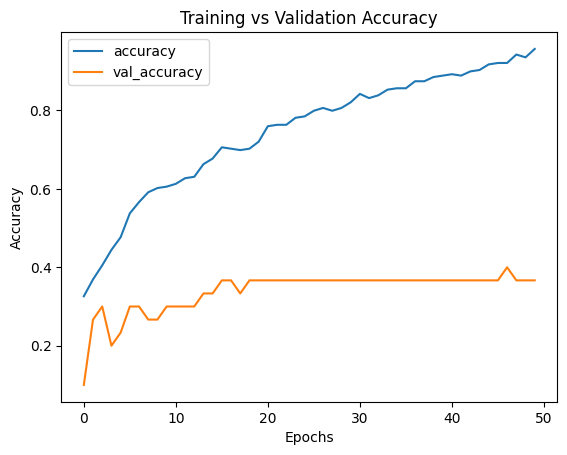

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming df1 is your dataframe with 'Labelled_Severity' as the target column
X = df1.drop("Labelled_Severity", axis=1)  # Features
y = df1["Labelled_Severity"]  # Target variable

# Step 1: Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=25)

# Step 3: Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=25)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 4: Build the Neural Network model
model = Sequential()

# Input layer and the first hidden layer
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (since we are predicting severity, use softmax for multi-class classification)
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes (Minor, Major, Fatal)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=20, validation_data=(X_test, y_test))

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
y_pred_class = y_pred.argmax(axis=1)  # Get the index of the highest probability class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
precision = precision_score(y_test, y_pred_class, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

# Optional: Plot the training history for better insight into performance
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')
plt.show()


In [33]:
df1

,Vehicle_Speed,Crash_Time,Age,Number_of_Lanes,Lane_Width,Speed_Limit,Gender_Male,Road_Type_Urban,Vehicle_Type_Heavy Vehicle,Vehicle_Type_T.W,Crash_Type_Rear-end,Seatbelt_Yes,Road_Surface_Icy,Road_Surface_Wet,Alcohol_Consumption_Yes,Labelled_Severity
0,107,11,27,2,3.484386,30,True,True,True,False,True,False,True,False,True,0
1,27,16,39,2,3.293091,110,True,False,False,False,True,True,False,False,True,0
2,87,14,42,3,3.218911,59,False,True,False,False,True,False,False,False,False,0
3,43,3,60,2,3.113012,73,False,False,True,False,True,False,False,True,False,0
4,72,8,70,3,3.106580,42,True,True,False,True,True,True,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,112,4,30,1,3.248476,118,True,True,False,False,False,False,True,False,False,2
296,87,21,52,2,3.037739,38,False,True,True,False,True,False,True,False,True,2
297,85,20,79,2,3.350668,80,False,False,True,False,True,False,False,True,True,2
298,44,5,23,3,3.419304,47,False,True,False,False,True,True,False,True,True,2
